In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%matplotlib inline

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [35]:
import Actuator_force as af

In [71]:
af.print_stats()

F_nut: 419.59104655824115
F_act: 516.5249561399658
w_max: 83.23722746051511
theta_min: 5.46502379990588
E_ratio: 8.181491291246676
Min Length: 23.98181808768893
Max Length: 196.20703583268897
I_stage1: 0.8630697997090299
I_stage2: 0.9022791988361196
I_base: 2.6153489985451497
alpha: 0.15707963267948966
F_app Grav Approximation: 32.1003280330555
Peak Motor Torque Requirement: 0.9179379950081881


In [37]:
af.w_l(af.L_max, af.l_bent, af.l_r, af.l_total)

24.049483010402337

In [38]:
def plot_w(l_b, l_o):
    l = np.arange(af.L_min, af.L_max, 1)
    w = [af.w_l(L, l_b, l_o, af.l_total) for L in l]
    plt.plot(w,l)
interact(plot_w, l_b = (0, 15, 0.5), l_o = (af.l_r/1.5, af.l_r*1.5, 1) )

interactive(children=(FloatSlider(value=7.0, description='l_b', max=15.0, step=0.5), FloatSlider(value=45.0, d…

<function __main__.plot_w(l_b, l_o)>

In [39]:
def plot_L_theta(l_b, l_o, colour):
    l_total = af.l_r*4 + l_o
    
    for i in np.linspace(af.theta_min(l_o), np.pi/2):
        w_min =  af.w_theta(i, l_o, l_total)
        if w_min<af.w_min:
            theta_max = i
            break

    theta = np.arange(af.theta_min(l_o), theta_max, 0.01)
    w = [af.w_theta(th, l_o, l_total) for th in theta]
    l  = [af.L_theta(th, l_b, l_total) for th in theta]
    plt.plot(w,l, color = colour)
    return l,w,theta
# interact(plot_L_theta, l_b = (0, 15, 0.5), l_o = (af.l_r/1.5, af.l_r*1.5, 1), colour = 'r' )

Text(0.5, 0, 'Width (mm)')

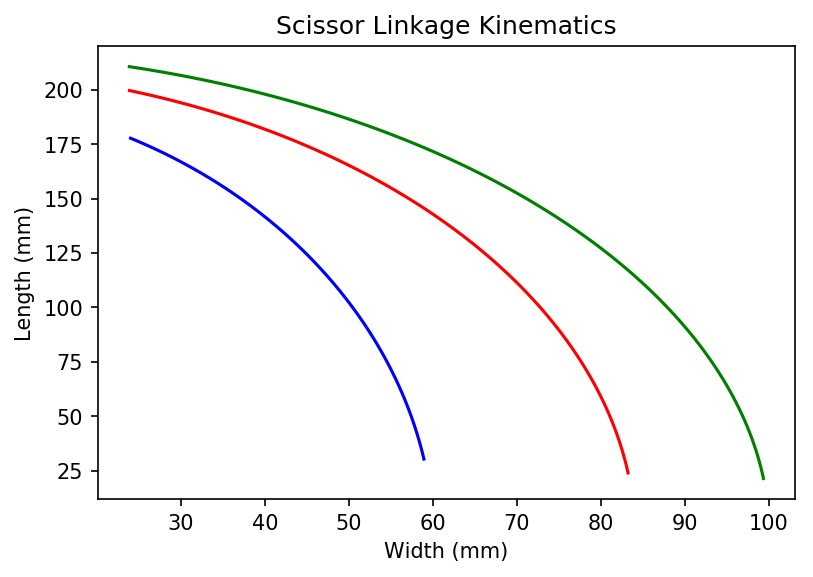

In [40]:
l1, w1, theta1 = plot_L_theta(4, 42, 'r')
l2, w2, theta2 = plot_L_theta(4, 30, 'b')
l3, w3, theta3 = plot_L_theta(4, 50, 'g')
plt.title("Scissor Linkage Kinematics")
plt.ylabel("Length (mm)")
plt.xlabel("Width (mm)")
# plt.savefig("ScissorK.png")

-31.41592653589793


Text(0.5, 1.0, 'Motor Speed and Torque Required for dL/dt = 10(mm/s)')

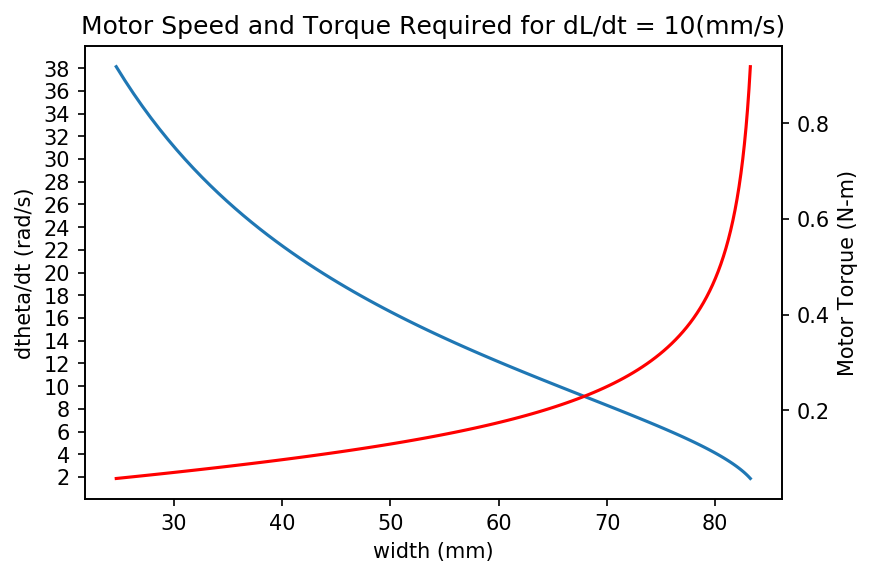

In [60]:
def plot_dtheta_dt(ax, l, w, dL_dt):
    dtheta_dt = []
    k = -dL_dt*np.pi/(af.lead*1000)
    print(k)
    for i in range(len(l) - 1):
        dtheta_dt.append( k*(w[i+1] - w[i])/(l[i+1] - l[i]) )
    ax.plot(w[0:-1], dtheta_dt)
    plt.yticks(np.arange( round(min(dtheta_dt)), round(max(dtheta_dt)+1), 2.0))
    return dtheta_dt

def plot_T_motor(ax, theta, w):
    T = []
    for i in range(len(theta) - 1):
        T.append( af.T_motor(theta[i], af.F_app, af.l_bent, af.l_r, af.l_total))
    
    ax.plot(w[0:-1], T, 'r')
    return T



fig, ax1 = plt.subplots()


dL_dt = 10 #mm/s
plt.xlabel("width (mm)")
plt.ylabel("dtheta/dt (rad/s)")
dtheta_dt = plot_dtheta_dt(ax1, l1,w1, dL_dt);
ax2 = ax1.twinx()
plt.ylabel("Motor Torque (N-m)")


T_motor = plot_T_motor(ax2, theta1, w1)

plt.title("Motor Speed and Torque Required for dL/dt = "+ str(dL_dt) + "(mm/s)")


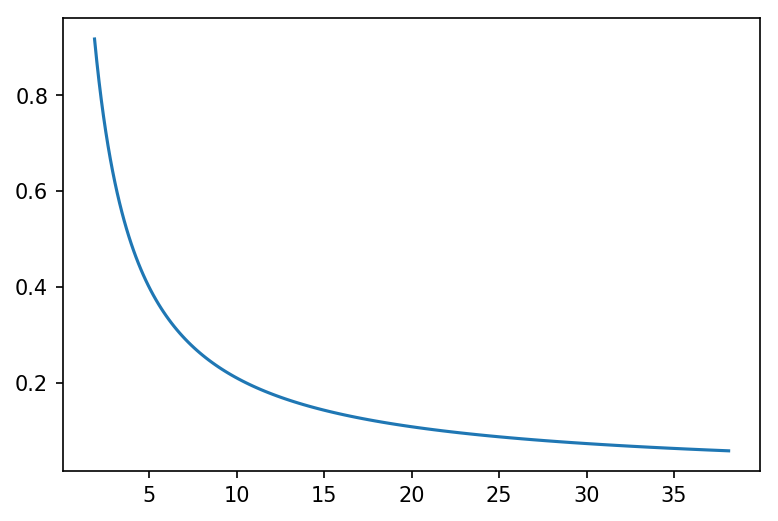

In [61]:
plt.plot(dtheta_dt,T_motor)

Text(0.5, 1.0, 'Motor Power Required for dL/dt = 4(mm/s)')

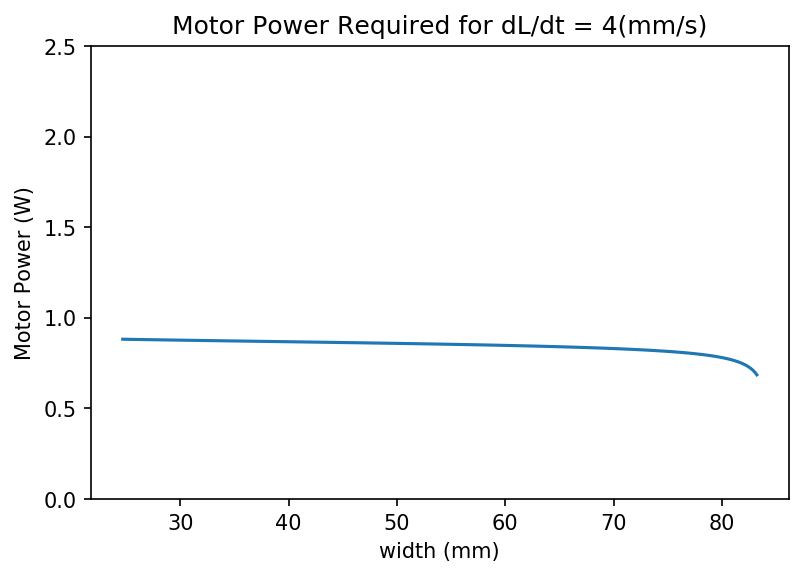

In [56]:
# Power Plot
P = [] 
for i in range(len(T_motor)):
    P.append(T_motor[i]*dtheta_dt[i])
plt.plot(w1[0:-1], P)
plt.xlabel("width (mm)")
plt.ylim(0, 2.5)
plt.ylabel("Motor Power (W)")
plt.title("Motor Power Required for dL/dt = "+ str(dL_dt) + "(mm/s)")


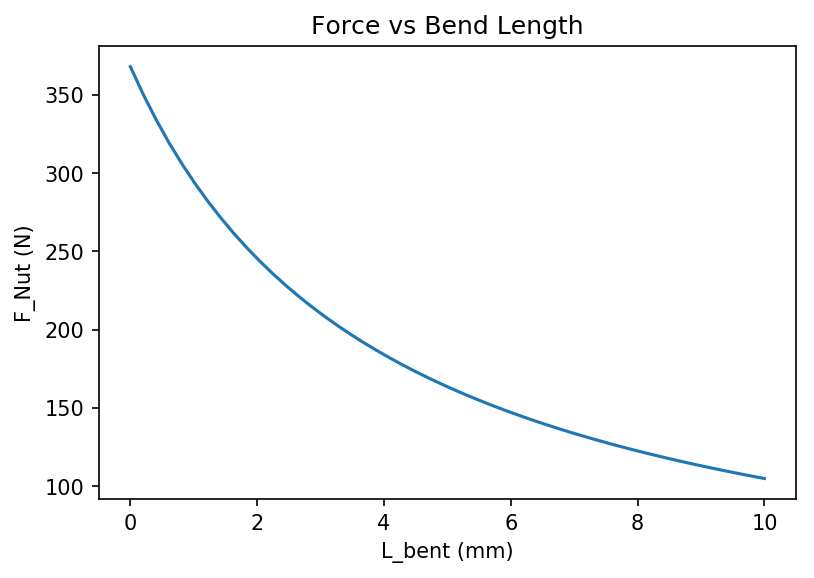

In [52]:
lb = np.linspace(0, 10)
F = [af.F_nut(af.theta_min(af.l_r),af.F_app, l_b, af.l_r, af.l_total ) for l_b in lb]
plt.plot(lb, F)
plt.xlabel("L_bent (mm)")
plt.ylabel("F_Nut (N)")
plt.title("Force vs Bend Length")
plt.savefig("f_bent.png")

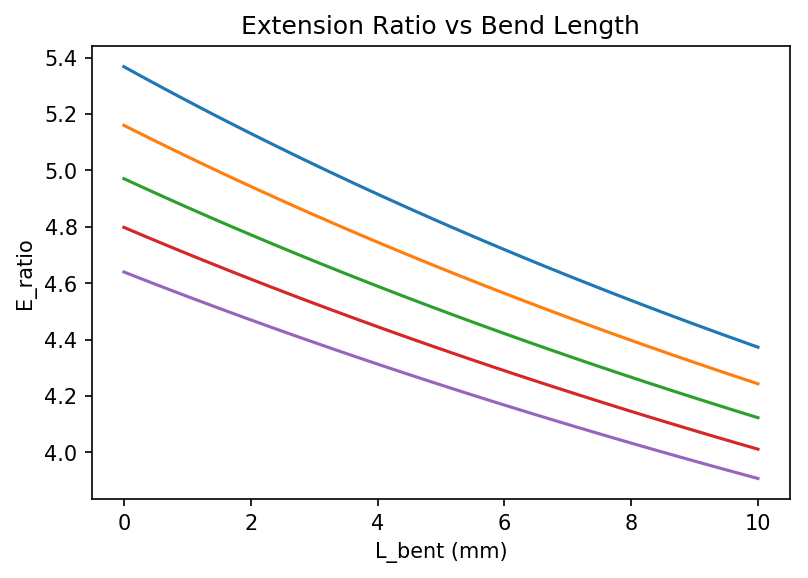

In [37]:
for offset in range(20,30,2):
    E_ratio = [af.E_ratio(l_b, af.l_r, af.l_total, offset) for l_b in lb]
    plt.plot(lb, E_ratio)
plt.title("Extension Ratio vs Bend Length")
plt.xlabel("L_bent (mm)")
plt.ylabel("E_ratio")
plt.savefig("e_ratio.png")

In [68]:
af.theta_w(83.23, 4, 42)/np.pi*180

5.499512638694658

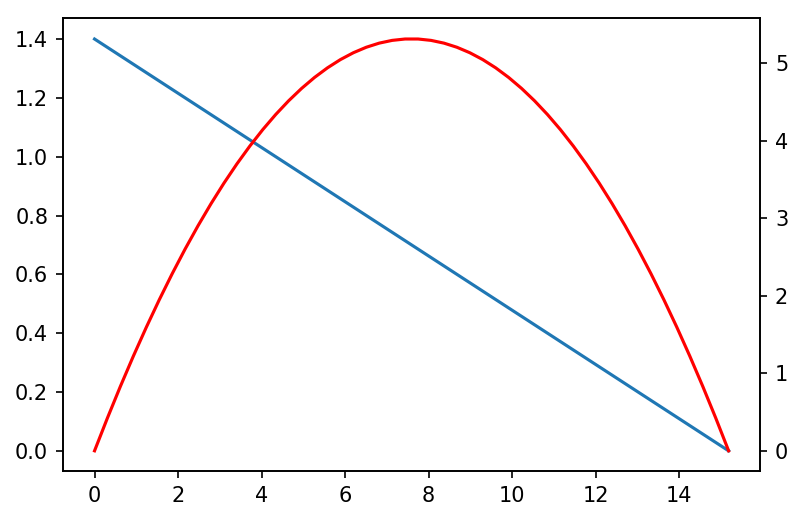

In [109]:
def plot_motor_param(T_stall, w_noload):
    fig, ax1 = plt.subplots()
    w = np.linspace(0,w_noload)
    T = np.array([-(T_stall/w_noload)*ww+ T_stall for ww in w])
    ax1.plot(w,T)

    P = w*T
    ax2 = ax1.twinx()
    ax2.plot(w,P,'r')

T_stall = 1.12*(15/12.0) #N-m
w_noload = (116*(15/12.0)/60.0)*2*np.pi #rad/s
plot_motor_param(T_stall, w_noload)




phi_f: 183.6889224553952
time to rise: 45.18


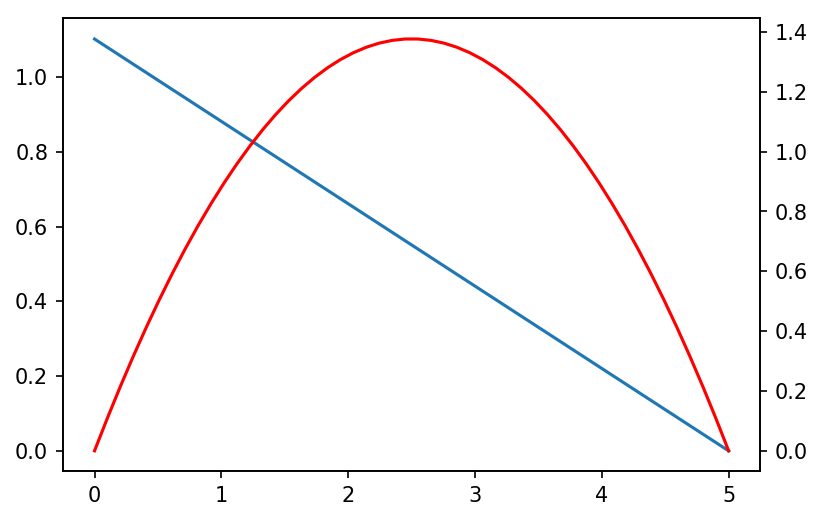

In [116]:
w_noload_trial = 5
t = af.sim_phi(w_noload_trial, 0.01)
print("time to rise: " + str(t))
plot_motor_param(af.T_stall, w_noload_trial)

In [114]:
%autoreload